# Desenvolvimento de Modelos

Tópicos:
* Métodos de Avaliação
* Regressão Polinomial
* Pipeline
* Overfitting e Underfitting
* Medidas de Avaliação na Amostra

### Iniciando nossa base de dados

In [30]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline 

In [31]:
# acessando o dataset
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [32]:
# definindo as nossas variáveis de treinamento e de teste 
lista_col = list(df.columns) 
lista_col.remove('price')
X_train, X_test, Y_train, Y_test = train_test_split(df[lista_col], df["price"], test_size = 0.3, random_state = 0)

## Métodos de Avaliação com Visualização

Métodos de visualização podem nos ajudar a entender se escolhemos o melhor modelo para nossos dados. Segundo a plataforma do Seaborn: 

> " O objetivo do seaborn, no entanto, é tornar a exploração de um conjunto de dados por meio da visualização rápida e fácil, pois isso é tão (se não mais) importante quanto explorar um conjunto de dados por meio de tabelas de estatísticas"


Veremos a seguir algumas visualizações para avaliar a precisão do nosso modelo:

### Regression Plot

Esta função desenha um gráfico de dispersão (scatterplot) das variáveis X e Y e ajusta (fit) o modelo de regressão e plota a regressão linear obtida, assim como um intervalo de 95% de confiança

(0.0, 48163.79129086464)

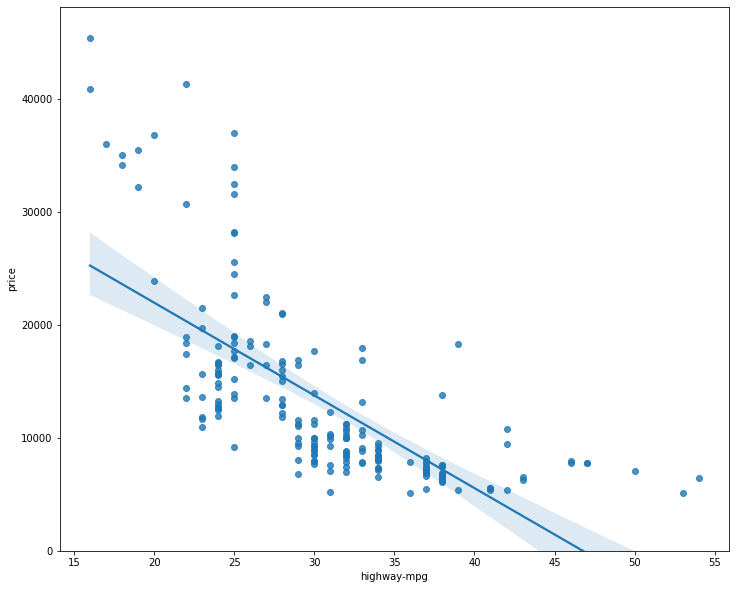

In [33]:
#dimensiona o taamnho da imagem
width = 12
height = 10
plt.figure(figsize=(width, height))
#chamada da função regression plot
sns.regplot(x="highway-mpg", y="price", data=df)
# definição do limite para o eixo Y do gráfico gerado
plt.ylim(0,)

### Residual Plot

Esta função gera uma regressão de X em Y e então desenha um gráfico de dispersão (scatterplot) dos resíduos, que são a diferença entre o valor real e o valor previsto pela regressão. O resultado esperado deve ter média 0, sem apresentar curvas, para ser considerado um bom modelo.

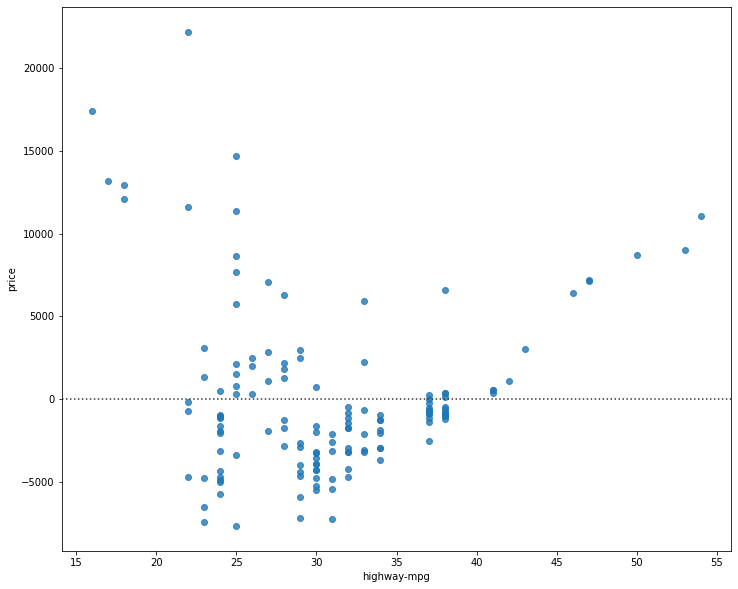

In [34]:
#define o tamanho da imagem
width = 12
height = 10
plt.figure(figsize=(width, height))
#chamada da função residplot
sns.residplot(x=X_train['highway-mpg'],y=Y_train)
#plt.show()

### Distribuition Plot

Conta a quantidade de pontos de cada resíduo e gera um histograma com a distribuição. Também pode transformar este histograma em valores continuos gerando uma distribuição.

In [35]:
# criando também uma regressão linear multipla
lmM = LinearRegression()
lmM.fit(X_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], Y_train)
lmM.score(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], Y_test)

0.7561962236525638

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proporção')

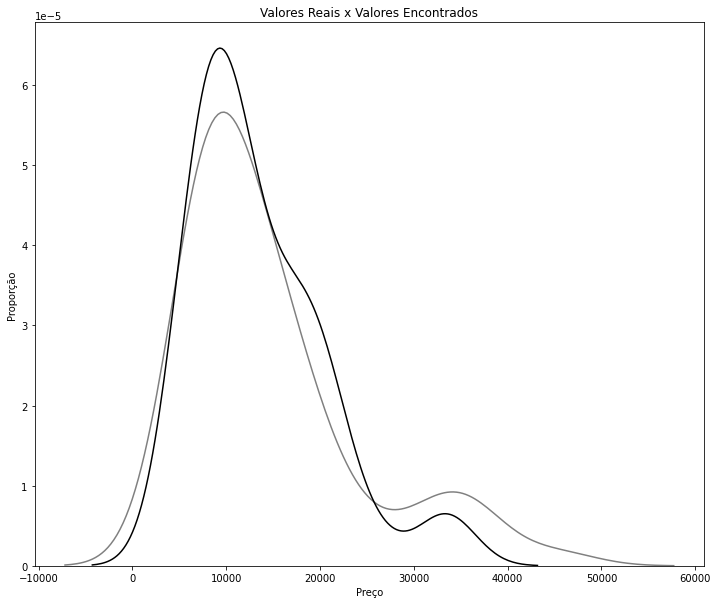

In [36]:
#multilinear

# adicionamos aqui a regressão que queremos avaliar
Y_hat = lmM.predict(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
#configura o tamanho da imagem
plt.figure(figsize=(width, height))
#adicionamos os dados reais marcados como eixo
ax1 = sns.distplot(Y_test, hist=False, color="gray", label="Actual Value")
#e adicionamos os dados da regressão
sns.distplot(Y_hat, hist=False, color="black", label="Fitted Values" , ax=ax1)

plt.title('Valores Reais x Valores Encontrados')
plt.xlabel('Preço')
plt.ylabel('Proporção')

#plt.show()
#plt.close()

## Regressão Polinomial

Com o mesmo processo da regressão linear, agora buscamos uma função polinomial de grau pré-definido na forma: 

$ Y = b_0 + b_1X + b_2X^2 + ... + b_nX^n $


In [37]:
# esta é uma função para exibição do gráfico do nosso modelo
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    #plt.close()

        3         2
-1.473 x + 195.1 x - 8592 x + 1.328e+05


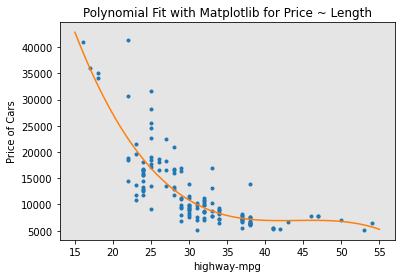

In [38]:
#definimos as nossas variáveis de treinamento
x = X_train['highway-mpg']
y = Y_train
# gera um polinomio (aqui de grau 3) através do ajuste com os dados (nossa regressão polinomial)
f = np.polyfit(x, y, 3)
# função para encapsular a função gerada
p = np.poly1d(f)
#axibimos a nossa função
print(p)

#exibimos o gráfico criado
PlotPolly(p, x, y, 'highway-mpg')

           11             10             9           8         7
-1.23e-08 x  + 4.708e-06 x  - 0.0008064 x + 0.08156 x - 5.408 x
          6        5            4             3             2
 + 246.7 x - 7892 x + 1.77e+05 x - 2.727e+06 x + 2.747e+07 x - 1.627e+08 x + 4.296e+08


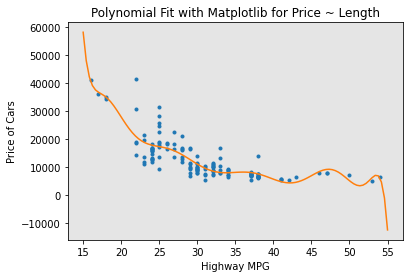

In [39]:
#aqui vamos fazer novamente a geração, mas com um polinômio de grau 11
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

### Pipelines

Regressões polinomiais com mais colunas de dados vão se tornando mais complexas, já que tomam a forma: 

$Y = b_0 + b_1X_1 + b_2X_2 + b_3X_1X_2 + b_4X_1^2 + b_5X_2^2 + ...$ 

Importante ressaltar que para este formato, a biblioteca Numpy já não é mais capaz de gerar um modelo, como usamos anteriormente


In [40]:
pr=PolynomialFeatures(degree=2)
Z = X_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z_pr=pr.fit_transform(Z)

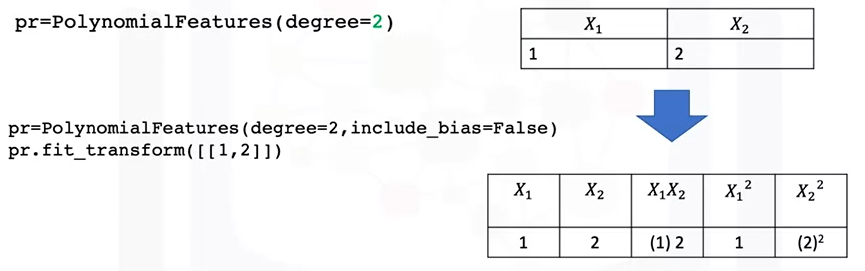

In [41]:
print("dados originais:", Z.shape, "dados depois da transformação:", Z_pr.shape)

dados originais: (140, 4) dados depois da transformação: (140, 15)


In [50]:
dataEx = pd.DataFrame(Z_pr)
dataEx.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,97.0,2324.0,120.0,34.0,9409.0,225428.0,11640.0,3298.0,5400976.0,278880.0,79016.0,14400.0,4080.0,1156.0
1,1.0,85.0,2212.0,109.0,34.0,7225.0,188020.0,9265.0,2890.0,4892944.0,241108.0,75208.0,11881.0,3706.0,1156.0
2,1.0,70.0,1909.0,90.0,43.0,4900.0,133630.0,6300.0,3010.0,3644281.0,171810.0,82087.0,8100.0,3870.0,1849.0
3,1.0,70.0,2109.0,98.0,37.0,4900.0,147630.0,6860.0,2590.0,4447881.0,206682.0,78033.0,9604.0,3626.0,1369.0
4,1.0,69.0,2028.0,97.0,37.0,4761.0,139932.0,6693.0,2553.0,4112784.0,196716.0,75036.0,9409.0,3589.0,1369.0


Para facilitar nosso trabalho nessa regressão criamos os Pipelines, onde podemos condensar nossos passos de normalização, transformação polinomial e regressão linear.

In [42]:
# geramos um vetor com as funções que utilizaremos respectivamente:
# normalização, transformação polinomial, regressão
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [43]:
#criamos um objeto pipeline
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
#apenas uma conversão de tipos para garantia
Z = Z.astype(float)
#realizamos o treinamento
pipe.fit(Z,Y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
#fazemos nossa predição
ypipe=pipe.predict(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
ypipe[0:4]

array([ 6114.99339167,  9802.44391239, 20426.51018043, 20630.81560215])

## Overfitting e Underfitting

Utilizando ferramentas de visualização, podemos perceber se está ocorrendo estes problemas quando temos:

Underfitting: quando temos um alto erro no treinamento com valor próximo ao erro na validação
<img src="https://didatica.tech/wp-content/uploads/2020/02/Underfitting-1024x394.png">

Overfitting: quando temos um baixo erro no treinamento e alto erro na validação
<img src="https://didatica.tech/wp-content/uploads/2020/02/Overfitting-1024x396.png">

Podemos calcular melhor estes pontos na próxima seção


## Medidas de avaliação na amostra 

### Mean Square Error (MSE)

O MSE (Erro Quadrado Médio) calcula a média dos quadrados dos erros, ou seja, a diferença entre o valor real (y) e o valor estimado (ŷ).

<img src="https://i.stack.imgur.com/gHG8I.png" width=500px>

### R²

R², também conhecido como coeficiente de determinação, é uma medida para indicar o quão próximo os dados estão da linha de regressão ajustada. O valor do R² é a porcentagem de variação da variável de resposta (y) que é explicada por um modelo linear.

$ R^2 = \left( 1 - \dfrac{\text{MSE da linha de regressão}}{\text{MSE da média dos dados}} \right)$